# Network Analysis

A network graph analysis is considered a network analysis if:

- The nodes in a graph represent people.
- Edges represent relations between them.
- The business question we are trying to answer has a strong social tinge.

## Criteria on determining adjacency in a graph.

### Triangles

A triangle is a set of 3 vertices such that any two of them are connected by an edge of the graph; the graph is then said to "contain" that triangle.

### Graph density

A complete graph is a graph in which each pair of graph vertices is connected by an edge. With complete graphs occures another concept which is graph density.
Graph density represents the ratio between the edges present in a graph and the maximum number of edges that the graph can contain.

## Case study - fraud analysis

There are two path's:

- Basic analysis od fraud detection
- Guardians concept


#### Basic analysis

In this technique, we calculate probability as the sum of the cheater nodes connected to the new node by the total number of nodes connected to the new node.


#### Guardians concept

In the first step, the fraud is classified on a given scale for each known fraudster.

The degree of suspicion is a suspicion that the person may be involved in a fraud.

Calculation of the degree of suspicion:

- We calculate the average of the four centrality indicators
- We multiply it by the weight of the negative result, i.e. the classification of the scale of fraud.
- We normalize the result by dividing by the maximum negative result

##### The degree of suspicion for a new node

To calculate the degree of a new node, add all degrees of suspicion of nodes connected to the new node and divide by the number of these nodes.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

The first step will be to create our graph. The red nodes represent already detected fraudsters, and the green ones represent the innocent ones. Each node is assigned a number from 1 to 10.

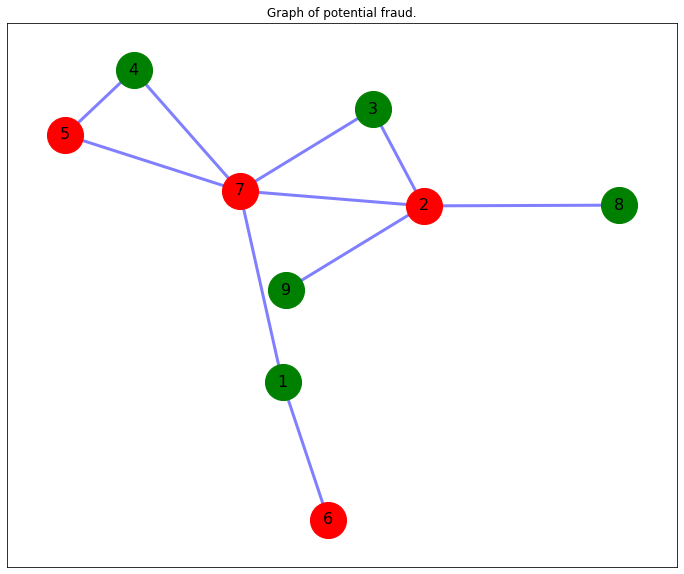

In [2]:
G = nx.Graph()
nodes = range(1, 10)
edges = [(7, 2), (2, 3), (7, 4), (4, 5), (7, 3), (7, 5), (1, 6), (1, 7), (2, 8), (2, 9)]

G.add_nodes_from(nodes)
G.add_edges_from(edges)

pos = nx.spring_layout(G)

fig = plt.figure(figsize=(12, 10))

nx.draw_networkx_nodes(G, pos, nodelist=[1,4,3,8,9], node_color='g', node_size=1300)
nx.draw_networkx_nodes(G,pos,nodelist=[2,5,6,7], node_color="r", node_size=1300)
nx.draw_networkx_edges(G,pos,edges,width=3,alpha=0.5,edge_color='b')

labels = {i: str(i) for i in range(1, 10)}
nx.draw_networkx_labels(G, pos, labels=labels, font_size=16)

plt.title("Graph of potential fraud.")
plt.show()

The next step will be to determine the graph centrality coefficients.

# Centrality

Centrality is a concept that allows us to identify how important is a node in a graph. Now we need to identify what is "imporant".
There are various indicators to judge the centrality of a specific vertex in the graph. For example, they can be expressed by the weight of a given person in the graph.

### Degree centrality

First, define the degree of the node. If we are dealing with a **non-directed graph**, then the degree of a node is defined as the number of connections of a given node with others. However, in the case of a directed graph, the degree can be divided into incoming and outgoing degree, i.e. the number of connections to and from the node. Gradual vertex centrality is defined as the degree of a given vertex divided by the number of vertices minus one.

### Closenes centrality

As its name suggests, closeness centrality measures how close and central a node is to other nodes. For a given node u, it represents the reciprocal of the sum of the shortest path distances from u to all n-1 other nodes, as described in the formula below:

$$C(u) = \frac{n-1}{\sum^{n-1}_{v=1}d(u,v)}$$

where $d(u,v)$ is the shortest-path distance between $v$ and $u$ and $n$ is the number of nodes in the graph.

### Betweeness centrality

<img src="betweeness_centrality.png" />



In [3]:
cent1 = nx.eigenvector_centrality(G)
cent2 = nx.degree_centrality(G)
cent3 = nx.betweenness_centrality(G)
cent4 = nx.closeness_centrality(G)

print("Eigen vector centrality: ", cent1)
print("Degree centrality: ", cent2)
print("Betweenness centrality: ", cent3)
print("Closeness centrality: ", cent4)

Eigen vector centrality:  {1: 0.23718954703334272, 2: 0.44568334430993706, 3: 0.3644005791401007, 4: 0.3204396611665085, 5: 0.3204396611665085, 6: 0.08325088296668741, 7: 0.5925237685713423, 8: 0.15643115829567805, 9: 0.15643115829567805}
Degree centrality:  {1: 0.25, 2: 0.5, 3: 0.25, 4: 0.25, 5: 0.25, 6: 0.125, 7: 0.625, 8: 0.125, 9: 0.125}
Betweenness centrality:  {1: 0.25, 2: 0.46428571428571425, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.7142857142857142, 8: 0.0, 9: 0.0}
Closeness centrality:  {1: 0.5, 2: 0.6153846153846154, 3: 0.5333333333333333, 4: 0.47058823529411764, 5: 0.47058823529411764, 6: 0.34782608695652173, 7: 0.7272727272727273, 8: 0.4, 9: 0.4}


We give the fraudulent people the degree of their offense and then calculate the average of their centrality indicators for each node.

In [6]:
centrality = dict()

deg = {
    1: 0,
    2: 6,
    3: 0,
    4: 0,
    5: 7,
    6: 8,
    7: 10,
    8: 0,
    9: 0
}

for k in range(1, 10):
    centrality[k] = (cent1[k] + cent2[k] + cent3[k] + cent4[k])/4

centrality

{1: 0.3092973867583357,
 2: 0.5063384184950667,
 3: 0.2869334781183585,
 4: 0.2602569741151566,
 5: 0.2602569741151566,
 6: 0.13901924248080227,
 7: 0.6647705525324459,
 8: 0.1703577895739195,
 9: 0.1703577895739195}

The final step will be to multiply centrality by the degree of the offense and to normalize it by dividing by the maximum degree of the offense.

In [7]:
DOS = {k: (centrality[k]*deg[k])/10 for k in deg.keys()} 
print(DOS)

{1: 0.0, 2: 0.30380305109704003, 3: 0.0, 4: 0.0, 5: 0.1821798818806096, 6: 0.11121539398464182, 7: 0.6647705525324459, 8: 0.0, 9: 0.0}
